# 라이브러리 Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.display import display, HTML

## 주식 데이터 로드
- 나스닥 종목 중에 2020년에 가장 뜨거웠던 테슬라 데이터를 예시로 사용하겠습니다.
- 2019년 12월 1일부터 2020년 11월 30일까지의 1년간 데이터를 yfinance를 이용하여 가져오겠습니다.
- yfinance 라이브러리가 없다면, '!pip install yfinance'를 통해서 설치해 주세요.

In [7]:
import yfinance as yf

df = yf.download('TSLA', start="2019-12-01", end="2020-11-30")
df['Date'] = df.index

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-12-02,65.879997,67.276001,65.737999,66.973999,66.973999,30372500,2019-12-02
2019-12-03,66.524002,67.582001,66.438004,67.239998,67.239998,32868500,2019-12-03
2019-12-04,67.550003,67.571999,66.570000,66.606003,66.606003,27665000,2019-12-04
2019-12-05,66.566002,66.884003,65.449997,66.073997,66.073997,18623000,2019-12-05
2019-12-06,67.000000,67.772003,66.954002,67.178001,67.178001,38062000,2019-12-06


# 단순 이동 평균(SMA) 및 지수 이동 평균(EMA)을 계산하는 함수
- 이동 이동 평균에 주로 이용되는 시간 간격은 15, 20, 30일 입니다.

In [8]:
# 단순 이동 평균(Simple Moving Average, SMA)
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

# 지수 이동 평균(Exponential Moving Average, EMA)
def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()

# 이동평균 수럼/발산 계산 
- 이동평균 수렴/발산(Moving Average Convergence/Divergence, MACD)를 계산하는 함수를 만들어 보겠습니다. 
- 이동평균의 권장 기간은 장기 EMA의 경우 26일, 단기 EMA의 경우 12일, 신호선 EMA의 경우 9일입니다.

In [10]:
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
  # 단기 지수 이평선 계산 (AKA Fast moving average)
  ShortEMA = EMA(data, period_short, column=column)

  # 장기 지수 이평선 계산 (AKA Slow moving average)
  LongEMA = EMA(data, period_long, column=column)

  # 이동 평균 수렴/발산 계산 
  data['MACD'] = ShortEMA - LongEMA

  # 신호선 계산 
  data['Signal_Line'] = EMA(data, period_signal, column='MACD')
  #data['MACD'].ewm(span=period_signal, adjust=False).mean()
      
  return data

# 상대적 강도 지수(RSI) 계산
- 상대적 강도 지수는 보통 14일 동안의 데이터를 사용하여 계산합니다. 

In [11]:
def RSI(data, period = 14, column = 'Close'):
  delta = data[column].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
  delta = delta.dropna() # or delta[1:]
  up =  delta.copy()  # delta 값 복사
  down = delta.copy() # delta 값 복사
  up[up < 0] = 0 
  down[down > 0] = 0 
  data['up'] = up
  data['down'] = down
  AVG_Gain = SMA(data, period, column='up')#up.rolling(window=period).mean()
  AVG_Loss = abs(SMA(data, period, column='down'))#abs(down.rolling(window=period).mean())
  RS = AVG_Gain / AVG_Loss
  RSI = 100.0 - (100.0/ (1.0 + RS))
  
  data['RSI'] = RSI
  return data

# 각 이동 평균값을 DataFrame에 추가하기

In [13]:
df = MACD(df, period_long=26, period_short=12, period_signal=9)
df = RSI(df, period=14)
df['SMA'] = SMA(df, period=30)
df['EMA'] = EMA(df, period=20)

df.tail()

,Open,High,Low,Close,Adj Close,Volume,Date,MACD,Signal_Line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,,
2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32807300,2020-11-20,13.581698,4.691946,0.000000,-9.660004,73.722040,430.604666,438.454162
2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300,2020-11-23,18.466033,7.446764,32.239990,0.000000,74.904649,433.256332,446.396620
2020-11-24,540.400024,559.989990,526.200012,555.380005,555.380005,53648500,2020-11-24,24.757112,10.908833,33.530029,0.000000,79.569649,436.880666,456.775990
2020-11-25,550.059998,574.000000,545.369995,574.000000,574.000000,48930200,2020-11-25,30.889244,14.904915,18.619995,0.000000,79.704501,440.637333,467.940182
2020-11-27,581.159973,598.780029,578.450012,585.760010,585.760010,37561100,2020-11-27,36.279727,19.179878,11.760010,0.000000,83.523376,445.200000,479.161118


# 이동 평균 수렴/발산과 신호선 시각화(MACD vs Signal Line)

Text(0, 0.5, 'USD Price ($)')

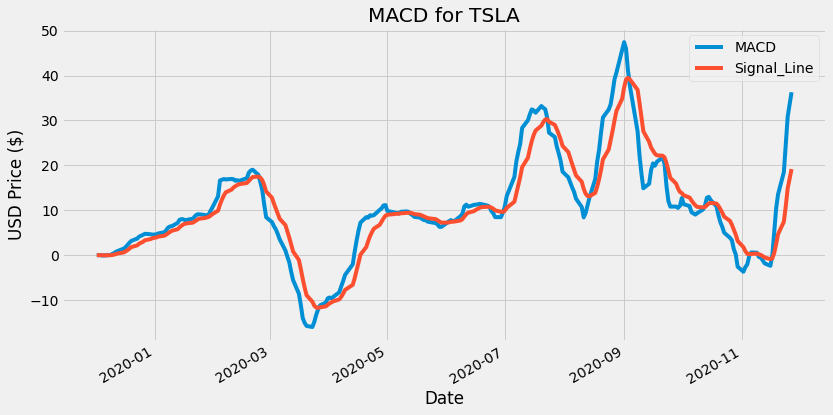

In [14]:
# Create a list of columns to keep
column_list = ['MACD','Signal_Line']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('MACD for TSLA')
plt.ylabel('USD Price ($)')

# 단순 이동 평균선과 주가 데이터 시각화

Text(0, 0.5, 'USD Price ($)')

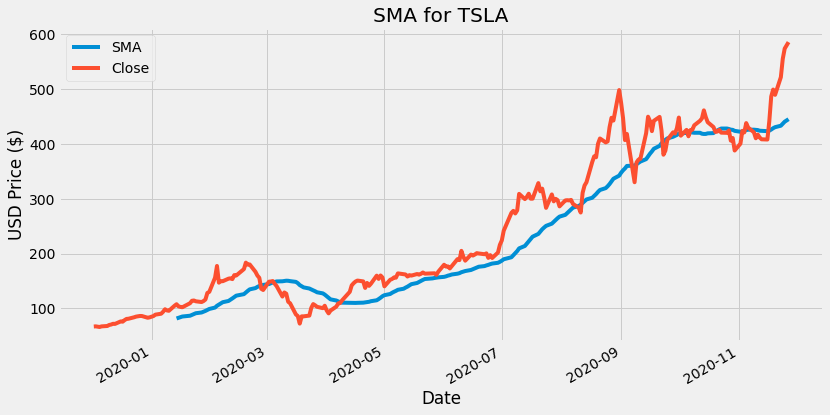

In [15]:
#Create a list of columns to keep
column_list = ['SMA','Close']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('SMA for TSLA')
plt.ylabel('USD Price ($)')

# 지수 이동 평균

Text(0, 0.5, 'USD Price ($)')

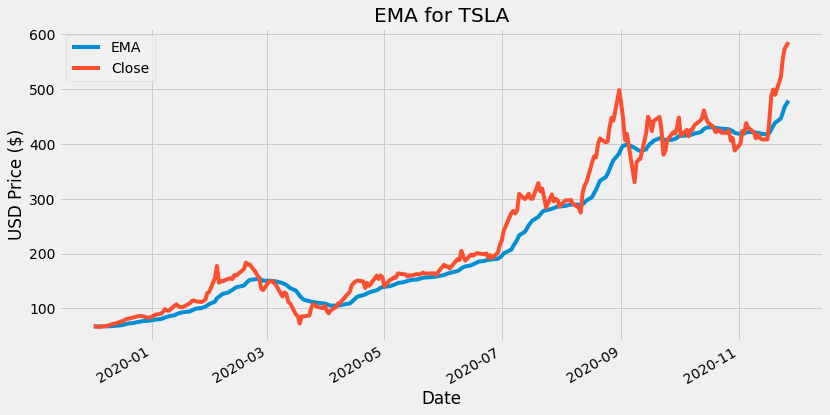

In [16]:
#Create a list of columns to keep
column_list = ['EMA','Close']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('EMA for TSLA')
plt.ylabel('USD Price ($)')

# 상대적 강도 지수(RSI) 시각화

Text(0, 0.5, 'USD Price ($)')

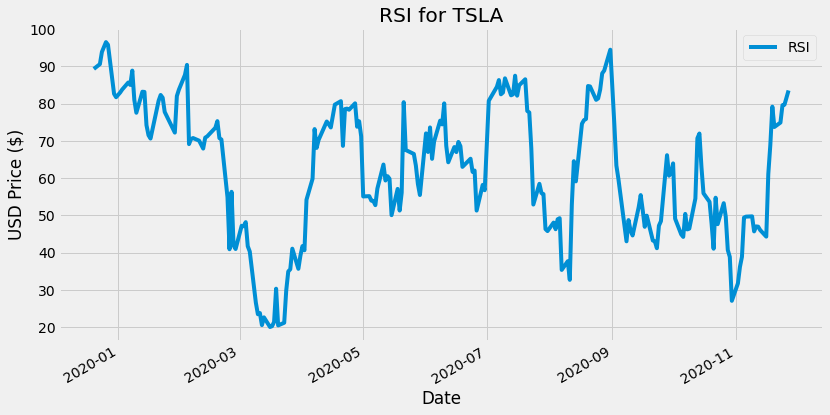

In [17]:
# 매도: RSI = 70 or greater
# 매수: RSI = 30 or lower
column_list = ['RSI']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('RSI for TSLA')
plt.ylabel('USD Price ($)')